In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [103]:
df = pd.read_csv('Salary Data.csv')


In [104]:
df.dropna(inplace=True)
df.drop_duplicates()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [105]:

gender_label = LabelEncoder()
df['Gender']=gender_label.fit_transform(df['Gender'])
edu_label_encoder = LabelEncoder()
df['Education Level'] = edu_label_encoder.fit_transform(df['Education Level'])
job_title_encoder = LabelEncoder()
df['Job Title']=job_title_encoder.fit_transform(df['Job Title'])

In [106]:
X = df.drop(['Salary'],axis=1)

In [177]:
y = df['Salary']
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,0,0,131,8.0,85000.0
371,43.0,1,1,30,19.0,170000.0
372,29.0,0,0,70,2.0,40000.0
373,34.0,1,0,137,7.0,90000.0


In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [215]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [216]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)



169    105000.0
38      40000.0
89      55000.0
168     50000.0
235     45000.0
         ...   
268     60000.0
345     60000.0
160     90000.0
336     40000.0
241     40000.0
Name: Salary, Length: 75, dtype: float64
[ 99939.88  28380.39  58348.38  52439.49  62029.48  46044.41  50131.46
  43781.97 183958.07 119554.48  58880.5  116459.73  91516.99  49507.92
 151713.34 152757.24  44697.17  51481.26  29890.47  43764.87 131666.9
  41102.08  42505.01 102997.28  85871.07 122231.44 134747.23  99047.51
  94517.2  102571.25 146905.4   58720.34  88345.13 147065.65  55479.85
  99894.07 184961.94  58880.5   84361.09 103146.05 180471.72 151052.65
 162721.87  55931.66 162985.04 139106.02 126753.33  49805.36 170833.07
  76830.3  170398.38  91511.21 165361.7  165556.23 150969.67 152734.36
 131117.81  70240.79  22734.57 156661.25 133397.32  99396.47 121075.95
  64640.72  55519.82  54547.38 136031.47 164386.47  61468.87 190607.76
  67606.66  67171.94 100008.47  41285.12  48459.76]


In [217]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9397976632294996

In [218]:
data = {
    "actual":y_test,
    "predicted":y_pred
}
final = pd.DataFrame(data)
print(final)

       actual      predicted
169  105000.0   99939.880706
38    40000.0   28380.389649
89    55000.0   58348.381326
168   50000.0   52439.487715
235   45000.0   62029.477640
..        ...            ...
268   60000.0   67606.660441
345   60000.0   67171.940927
160   90000.0  100008.466823
336   40000.0   41285.122113
241   40000.0   48459.760865

[75 rows x 2 columns]


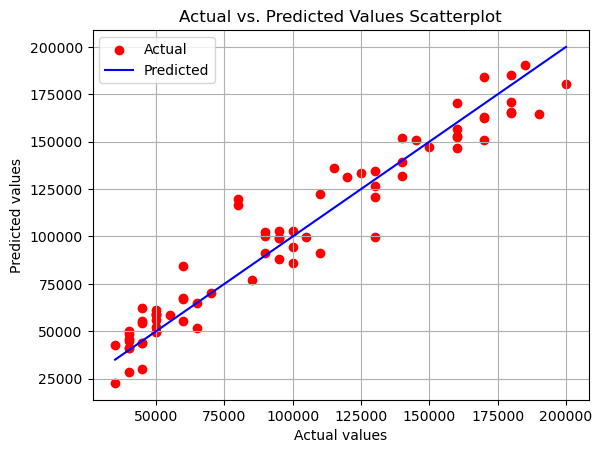

In [222]:
plt.scatter( y_test,y_pred ,color='red', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", label='Predicted')
plt.legend()
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Actual vs. Predicted Values Scatterplot')

plt.grid(True)